# Séries Temporais


Uma série temporal representa um registro ordenado no tempo de dados para uma variável de interesse (BOX et al., 2015). A análise desse tipo de informação é de fundamental importância em diversas áreas do conhecimento, com aplicações cada vez mais relevantes, uma vez que objetiva compreender o mecanismo gerador da série, diagnosticar o comportamento passado e permitir a previsão do comportamento futuro da variável.

Uma referência para o início da análise de séries temporais como disciplina é a aplicação de modelos autorregressivos pelo físico e professor de estatística na Universidade de Cambridge, Udny Yule, na década de 1920. Mas foi a partir da década de 1970 que a análise de séries temporais ganhou o formato moderno que conhecemos atualmente (NIELSEN, 2019).

O desenvolvimento dos métodos de análise de séries temporais desde a década de 1970 foi bastante influenciado pelo desenvolvimento da computação, que permitiu ampliar de forma significativa a coleta, armazenamento e processamento de informações. Esse desenvolvimento e o reconhecimento da importância de estudar séries temporais culminou em uma vasta literatura acadêmica e técnica.

Os desenvolvimentos dos estatísticos britânicos George Box e Gwilym Jenkins resultaram no texto “Time Series Analysis: Forecasting and Control”, publicado pela primeira vez em 1970 e que representou um divisor de água na análise de séries temporais. A abordagem de Box-Jenkins ainda é bastante utilizada para gerar previsões de séries temporais.  Aliás, este livro continua popular e está agora em sua quinta edição (NIELSEN, 2019).

## 1.1. Visualizando uma série temporal

Conforme apontado por Hyndman e Athanasopoulos (2022), a primeira coisa a fazer em qualquer análise de dados é plotar os dados. Isso é particularmente importante no caso dos dados de séries temporais. Os gráficos permitem visualizar o comportamento dos dados ao longo do tempo,  e a identificação de padrões, observações incomuns, mudanças ao longo do tempo e relações entre variáveis. 

As características que são vistas nos gráficos devem ser consideradas no momento de avaliar qual método ou modelo é o mais apropriado para análisar aquela série.

Para dados de séries temporais, o gráfico óbvio para começar é um gráfico de linha, da variável ou variáveis em análise em função do tempo, ou seja, as observações são plotadas em relação ao tempo com observações consecutivas.

No python, para iniciar nossa análise vamos importar as bibliotecas: *Numpy*, *Pandas* e o método *pyplot* da *Matplotlib*.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Vamos abrir um conjunto de dados referente ao consumo mensal total de energia elétrica no Brasil.

Os dados estão disponíveis no [Sistema Gerenciador de Séries Temporais (SGS)](https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries) do Banco Central do Brasil, mas possuem como fonte original a Eletrobras.

In [2]:
# Caso esteja executando este notebook no Google Colab
#from google.colab import files
#arquivo = files.upload()

In [3]:
# Importar dados
df = pd.read_csv('dados/consumo_energia.csv', sep=';')

In [4]:
# Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data                          520 non-null    object 
 1   consumo_energia_eletrica_GWh  520 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.2+ KB


Temos um objeto do tipo Data Frame (DF), com 2 colunas: 'data' e 'Consumo_energia_eletrica_GWh'.

Os dados são constituídos de uma série temporal com 520 observações.

Vamos usar as funções `head()` e `tail()` para visualizar as (5) primeiras e as (5) últimas observações da série.

In [5]:
# Visualizar dados no data frame
print(df.head())
print(df.tail())

     data  consumo_energia_eletrica_GWh
0  jan/79                         7.947
1  fev/79                         7.859
2  mar/79                         8.108
3  abr/79                         8.138
4  mai/79                         8.355
       data  consumo_energia_eletrica_GWh
515  dez/21                        42.937
516  jan/22                        42.566
517  fev/22                        41.929
518  mar/22                        44.218
519  abr/22                        43.123


Temos dados referentes ao período de janeiro de 1979 até abril de 2022.

Perceba que a variável `data` é um *object* e não está em um formato adequado para a análise. 

Vamos criar uma variável própria de tempo (`datetime64[ns]`), um formato adequado para a nossa análise.

In [6]:
# Criar uma variável DatetimeIndex com o método 'date_range()'
df['mes_ano'] = pd.date_range(start='1979-01-01', end='2022-05-01', freq='M')

# Visualizar primeiras (5) linhas
df.head()

,data,consumo_energia_eletrica_GWh,mes_ano
0,jan/79,7.947,1979-01-31
1,fev/79,7.859,1979-02-28
2,mar/79,8.108,1979-03-31
3,abr/79,8.138,1979-04-30
4,mai/79,8.355,1979-05-31


In [7]:
# Visualizar últimas (5) linhas
df.tail()

,data,consumo_energia_eletrica_GWh,mes_ano
515,dez/21,42.937,2021-12-31
516,jan/22,42.566,2022-01-31
517,fev/22,41.929,2022-02-28
518,mar/22,44.218,2022-03-31
519,abr/22,43.123,2022-04-30


Vamos converter a coluna `mes_ano`, que é `datetime64[ns]` como indice do *dataframe*, com o método `set_index`.

In [8]:
# Converter em indice
df = df.set_index('mes_ano')
df.head()

,data,consumo_energia_eletrica_GWh
mes_ano,,
1979-01-31,jan/79,7.947
1979-02-28,fev/79,7.859
1979-03-31,mar/79,8.108
1979-04-30,abr/79,8.138
1979-05-31,mai/79,8.355


A coluna `data` não será mais necessária na análise. Vamos excluí-la com o método `drop()`.

Nesse método, além do nome da columa, devemos especificar o argumento *axis*: *axis = 1* (coluna) ou *axis = 0* (linha).

In [9]:
# Excluir 
df = df.drop('data', axis=1)
df.head()

,consumo_energia_eletrica_GWh
mes_ano,
1979-01-31,7.947
1979-02-28,7.859
1979-03-31,8.108
1979-04-30,8.138
1979-05-31,8.355


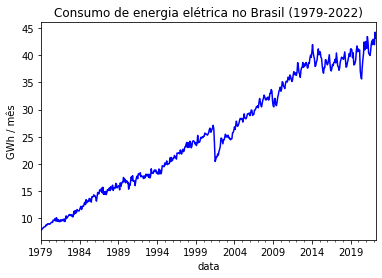

In [10]:
# Plotar dos dados
ax = df['consumo_energia_eletrica_GWh'].plot(color='blue')
# Especificar título para o eixo y (PIB)
ax.set_title('Consumo de energia elétrica no Brasil (1979-2022)')
# Especificar um tótulo para o eixo x
ax.set_xlabel('data')
# Especificar um tótulo para o eixo y (PIB)
ax.set_ylabel('GWh / mês')
# Mostrar gráfico
plt.show()

## 1.2. Algumas operações básicas na análise de séries temporais

**Selecionar períodos**

Podemos selecionar subconjuntos da série usando técnicas de fatiamento ("slicing").

In [11]:
# "Fatiar" um subconjunto: janeiro de 2003 até dezembro de 2021
df2 = df["2003-1" : "2021-12"]
print(df2.head())
print(df2.tail())

            consumo_energia_eletrica_GWh
mes_ano                                 
2003-01-31                        25.152
2003-02-28                        24.965
2003-03-31                        25.281
2003-04-30                        24.787
2003-05-31                        24.889
            consumo_energia_eletrica_GWh
mes_ano                                 
2021-08-31                        40.629
2021-09-30                        41.985
2021-10-31                        42.622
2021-11-30                        41.932
2021-12-31                        42.937


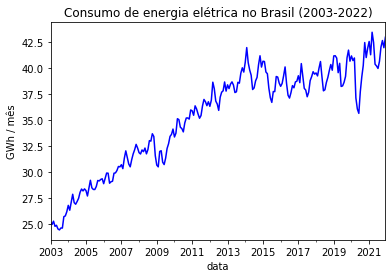

In [12]:
# Plotar dos dados
ax = df2['consumo_energia_eletrica_GWh'].plot(color='blue')
# Especificar título para o eixo y (PIB)
ax.set_title('Consumo de energia elétrica no Brasil (2003-2022)')
# Especificar um tótulo para o eixo x
ax.set_xlabel('data')
# Especificar um tótulo para o eixo y (PIB)
ax.set_ylabel('GWh / mês')
# Mostrar gráfico
plt.show()

**Deslocamentos**

Com o método `shift()` é criar uma nova coluna com os valores de uma variável deslocados por número desejado de períodos.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html


In [13]:
# Deslocar um período "para frente" 
df['shift1'] = df['consumo_energia_eletrica_GWh'].shift(1)
# Deslocar um período "para trás" (uma defasagem)
df['shift1m'] = df['consumo_energia_eletrica_GWh'].shift(-1)
# Ver o resultado
df.head()

,consumo_energia_eletrica_GWh,shift1,shift1m
mes_ano,,,
1979-01-31,7.947,NaN,7.859
1979-02-28,7.859,7.947,8.108
1979-03-31,8.108,7.859,8.138
1979-04-30,8.138,8.108,8.355
1979-05-31,8.355,8.138,8.379


**Diferença**

O método `diff()` é essencial na análise de séries temporais. Ele retorna uma nova coluna com difenças entre valores de dois períodos especificados.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

In [14]:
# Calcular diferença: y(t) - y(t-1)
df['diff1'] = df['consumo_energia_eletrica_GWh'].diff(1)
# Calcular diferença: y(t) - y(t-3)
df['diff3'] = df['consumo_energia_eletrica_GWh'].diff(3)
# Ver o resultado
df.head()

,consumo_energia_eletrica_GWh,shift1,shift1m,diff1,diff3
mes_ano,,,,,
1979-01-31,7.947,NaN,7.859,NaN,NaN
1979-02-28,7.859,7.947,8.108,-0.088,NaN
1979-03-31,8.108,7.859,8.138,0.249,NaN
1979-04-30,8.138,8.108,8.355,0.030,0.191
1979-05-31,8.355,8.138,8.379,0.217,0.496


**Variação percentual**

A variação relativa (e percentual) de uma variável, em um determinado intervalo de tempo, pode ser calculada com o método `pct_change()`.
Podemos multiplicar o resultado do método por 100, para que a nova variável esteja em forma percentual.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [15]:
# Calcular variação % entre (t) e (t-1)
df['pct1'] = df['consumo_energia_eletrica_GWh'].pct_change(1) *100
# Calcular variação % entre (t) e (t-3)
df['pct3'] = df['consumo_energia_eletrica_GWh'].pct_change(3) *100
# Ver o resultado
df.head()

,consumo_energia_eletrica_GWh,shift1,shift1m,diff1,diff3,pct1,pct3
mes_ano,,,,,,,
1979-01-31,7.947,NaN,7.859,NaN,NaN,NaN,NaN
1979-02-28,7.859,7.947,8.108,-0.088,NaN,-1.107336,NaN
1979-03-31,8.108,7.859,8.138,0.249,NaN,3.168342,NaN
1979-04-30,8.138,8.108,8.355,0.030,0.191,0.370005,2.403423
1979-05-31,8.355,8.138,8.379,0.217,0.496,2.666503,6.311236


**Funções de janela e cálculo de médias móveis**

As funções de janela são úteis quando queremos executar alguma operação em subconjuntos dos dados. Uma janela pode ser definida como um subconjunto de linhas do DF, em que desejamos aplicar alguma operação.

Funções de janela "móvel" ou "rolante" permitem executar operações de uma forma mais dinâmica, a cada intervalo de valores especificados.

Depois de definir uma janela, podemos realizar operações como calcular totais e médias móveis, por exemplo.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

Vamos aplicar esse tipo de método para o cálculo de médias móveis.

- Como temos dados mensais, vamos calcular média móveis para "janelas" de 12 meses.

In [16]:
# Calcular média móvel de 12 meses
df['mm_12'] = df['consumo_energia_eletrica_GWh'].rolling(12).mean()
# Ver o resultado
df.tail(12)

,consumo_energia_eletrica_GWh,shift1,shift1m,diff1,diff3,pct1,pct3,mm_12
mes_ano,,,,,,,,
2021-05-31,40.351,42.432,40.179,-2.081,-0.903,-4.904317,-2.188879,40.664500
2021-06-30,40.179,40.351,39.941,-0.172,-3.237,-0.426260,-7.455777,41.043583
2021-07-31,39.941,40.179,40.629,-0.238,-2.491,-0.592349,-5.870569,41.229083
2021-08-31,40.629,39.941,41.985,0.688,0.278,1.722541,0.688954,41.354667
2021-09-30,41.985,40.629,42.622,1.356,1.806,3.337518,4.494885,41.501167
2021-10-31,42.622,41.985,41.932,0.637,2.681,1.517209,6.712401,41.517500
2021-11-30,41.932,42.622,42.937,-0.690,1.303,-1.618882,3.207069,41.596333
2021-12-31,42.937,41.932,42.566,1.005,0.952,2.396738,2.267476,41.684083
2022-01-31,42.566,42.937,41.929,-0.371,-0.056,-0.864057,-0.131388,41.687000


Vamos aproveitar esse resultado para plotar um gráfico com a série original e média móvel.

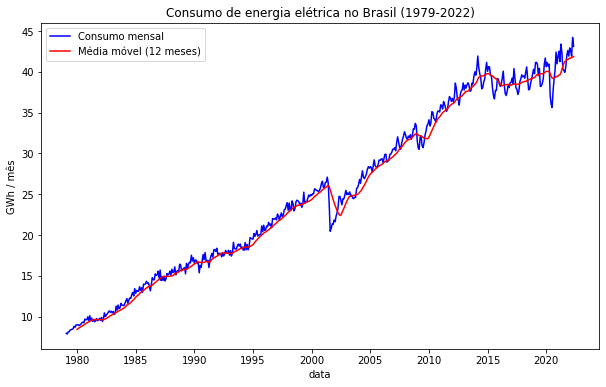

In [17]:
# Plotar dos dados
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['consumo_energia_eletrica_GWh'], color='blue', label="Consumo mensal")
ax.plot(df['mm_12'], color='red', label="Média móvel (12 meses)")

# Especificar título para o eixo y (PIB)
ax.set_title('Consumo de energia elétrica no Brasil (1979-2022)')
# Especificar um tótulo para o eixo x
ax.set_xlabel('data')
# Especificar um tótulo para o eixo y (PIB)
ax.set_ylabel('GWh / mês')
# Inserir legenda
ax.legend(loc='best')
# Mostrar gráfico
plt.show()